- Theoretical part
- definition of stability
- update rule

# Abstract
Artificial Neural Networks (ANN) are computational techniques that aim to realize a very simplified model of the human brain. In this way, ANN try to learn tasks mimicking the behavior of brain. The brain is composed of a large set of elements, specialized cells called neurons. In analogy with the human brain, ANN are computational methods that use a large set of elementary computational the neurons. Each single neuron is a very simple entity but the power of the brain is given by the fact that neurons are numerous and strongly interconnected between them. The human brain is one of the most computationally efficient device that is why in the late years a lot of effort has been done in order to develop an artificial version of it, as a matter of fact companies like Telsa motors are developing self driving cars which are based on ANN to implement the behavior of the human brain in computer systems. The easiest way to represent a neuron is either (on or off) or spin up/down in physics) with the synapsys either eccitative or inibitive. We can easily map the neural network into a spin system by mapping neurons in spins $\{s_i\}_{i=1,\cdots,N}$ and synapsys into the magnetic coupling $J_{ij}$.
By a specific representation of these coupling costant we can define the Hopfield model

## Hopfield model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp

In [2]:
# Parameters
L = 10  # Lenght of the edge of the image
N = L**2 # Number of spins 
p = 10 # Number of patterns
np.random.seed(1234) # Seed to make the random process reproducible

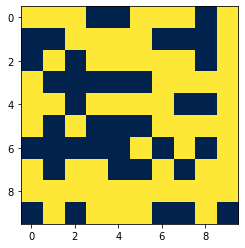

In [3]:
# Patterns
xi = np.random.randint(0,2,N*p).reshape(p,N) # Each line is a pattern
xi[xi==0]=-1
idx = np.random.randint(0,p)
plt.imshow(xi[idx].reshape(10,10),cmap='cividis') # This is an example of pattern 

In [4]:
# Coupling constant
# Row i is the connections of the i-th neuron with the others.
# Note that the hopfield model requires Jii=0
# Note that J is a symmetrical matrix (J=J.T)
global J
J = 1/N * np.array( [ (xi[:,i]*xi[:,j]).sum() for i in range(N) for j in range(N) ] )
J = J.reshape(N,N)
for i in range(len(J)):
    J[i,i] = 0
J==J.T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [5]:
# Update rule
def update(sys):
    N = len(sys)
    for i in range(N):
        temp = 0
        for j in range(N):
            temp +=  J[i][j]*sys[j] 
        sys[i] = np.sign(temp)
    return np.sign(sys)

def deterministic_hopfield(sys, t):
    for i in range(t):
        sys = update(sys)
    return sys

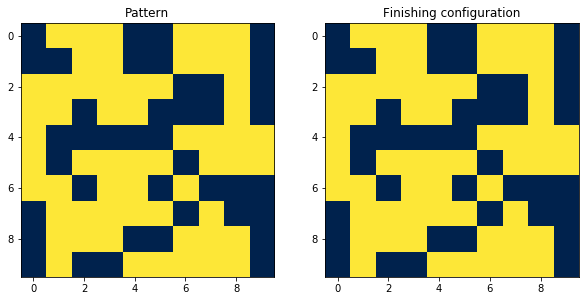

In [6]:
# actual algorithm
from copy import deepcopy
idx = np.random.randint(0,p)
sys = deepcopy(xi[idx])

sys = deterministic_hopfield(sys,30)

fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].set_title('Pattern')
ax[0].imshow(xi[idx].reshape(L,L), cmap='cividis')
ax[1].set_title('Finishing configuration')
ax[1].imshow(sys.reshape(L,L), cmap='cividis')

In [7]:
# Computing the stabilty of the algorithm
def score(xi, t):
    score = 0
    p = len(xi)
    for i in range(p):
        sys = deepcopy(xi[i])
        sys = deterministic_hopfield(sys,t)
        if np.all( [ sys, xi[i] ] ): score += 1
    return score/p

In [10]:
# We now look at the scaling with regards to the parameters
L = np.array([16])#,16,22,28])
scores = []
for n in N:
    P = np.arange(5,n/2,20)
    for p in P: 
        p = int(p)
        xi = np.random.randint(0,2,n*p).reshape(p,n) # Each line is a pattern
        xi[xi==0]=-1
        J = 1/n * np.array( [ (xi[:,i]*xi[:,j]).sum() for i in range(n) for j in range(n) ] )
        J = J.reshape(n,n)
        for k in range(len(J)):
            J[k,k] = 0
        scores.append( score(xi,10) )

In [11]:
scores

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

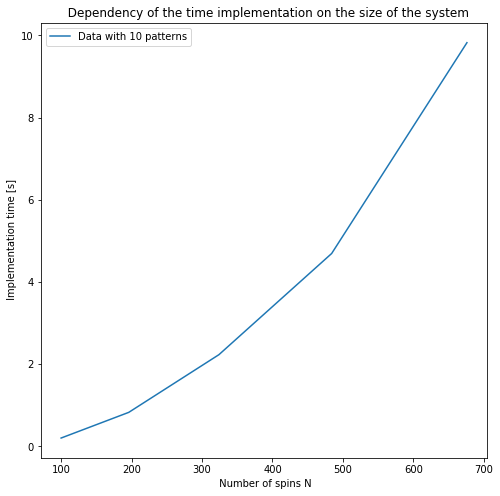

In [22]:
# How does the time scales with the number of spins N?
import time as time
L = np.arange(10,28,4)
N = L**2 
p = 10
times = []
for n in N:
    xi = np.random.randint(0,2,n*p).reshape(p,n)
    xi[xi==0]=-1
    J = 1/n * np.array( [ (xi[:,i]*xi[:,j]).sum() for i in range(n) for j in range(n) ] )
    J = J.reshape(n,n)
    for k in range(len(J)):
        J[k,k] = 0
    idx = np.random.randint(0,p)
    start = time.time()
    deterministic_hopfield(xi[idx],30)
    end = time.time()
    times.append(end-start)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(N,times, label = 'Data with 10 patterns')
ax.set(xlabel = ' Number of spins N', ylabel =' Implementation time [s]', 
              title = '  Dependency of the time implementation on the size of the system')
ax.legend()

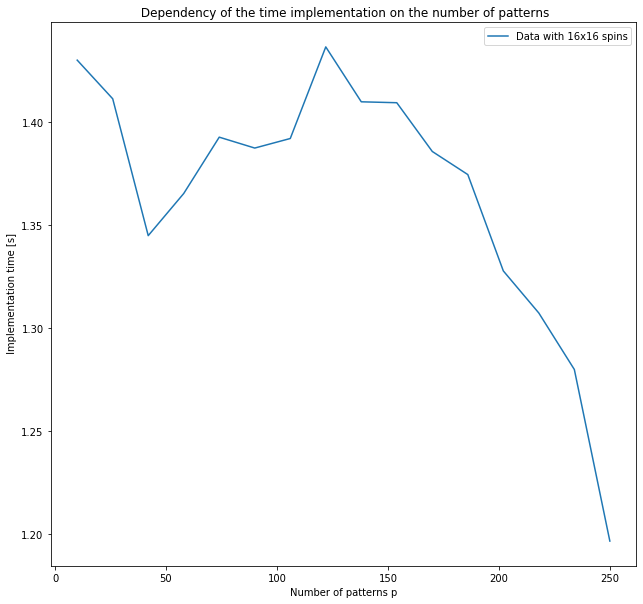

In [23]:
# How does the time scales with the number of pattern p with a fixed N?
import time as time
L = 16
N = L**2 
P = np.arange(10,N,16)
times = []
for p in P:
    p = int(p)
    xi = np.random.randint(0,2,N*p).reshape(p,N)
    xi[xi==0]=-1
    J = 1/N * np.array( [ (xi[:,i]*xi[:,j]).sum() for i in range(N) for j in range(N) ] )
    J = J.reshape(N,N)
    for k in range(len(J)):
        J[k,k] = 0
    idx = np.random.randint(0,p)
    start = time.time()
    deterministic_hopfield(xi[idx],30)
    end = time.time()
    times.append(end-start)

fig, ax = plt.subplots(figsize = (10.5, 10))
ax.plot(P,times, label = 'Data with 16x16 spins')
ax.set(xlabel = 'Number of patterns p', ylabel =' Implementation time [s]', 
              title = ' Dependency of the time implementation on the number of patterns')
ax.legend()